###### DataSet Link: https://www.kaggle.com/augustus0498/life-expectancy-who

# About the dataset - Regression
* The Global Health Observatory (GHO)data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. Analyzing this data will help to predict life expectancy based on health factors for 193 countries.
## Input variables explained:
### Life Expectancy (WHO) <br>
1 - Country: 193 Countries (Categorical)<br>
2 - Year: from 2000 to 2015 years (Numerical)<br>
3 - Status: Country is Developed or Developing (Categorical)<br>
4 - AdultMortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population (Numerical)<br>
5 - infantdeaths: Number of Infant Deaths per 1000 population (Numerical)<br>
6 - Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) (Numerical)<br>
7 - percentageexpenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%) (Numerical)<br>
8 - Hepatitis: BHepatitis B (HepB) immunization coverage among 1-year-olds (%) (Numerical)<br>
9 - Measles: Measles - number of reported cases per 1000 population (Numerical)<br>
10 - BMI: Average Body Mass Index of entire population (Numerical)<br>
11 - Under-fivedeaths: Number of under-five deaths per 1000 population (Numerical)<br>
12 - Polio: Polio (Pol3) immunization coverage among 1-year-olds (%) (Numerical)<br>
13 - Totalexpenditure: General government expenditure on health as a percentage of total government expenditure (%) (Numerical)<br>
14 - Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) (Numerical)<br>
15 - HIV/AIDS: Deaths per 1000 live births HIV/AIDS - 0-4 years (Numerical)<br>
16 - GDP: Gross Domestic Product per capita in USD (Numerical)<br>
17 - Population: Population of the country (Numerical)<br>
18 - thinness1-19years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% ) (Numerical)<br>
19 - thinness5-9years: Prevalence of thinness among children for Age 5 to 9(%) (Numerical)<br>
20 - Incomecompositionofresources: Human Development Index in terms of income composition of resources - index ranging from 0 to 1 (Numerical)<br>
21 - Schooling: Number of years of Schooling in years (Numerical)<br>
## Output variables explained ( Target Variable):
22 - Lifeexpectancy: Life Expectancy in age (Numerical)<br>

## Approach
In order to optimize life expectency with the help of the dataset, we will have to take the following steps:
* Import data from dataset and perform initial high-level analysis: look at the number of rows, look at the missing values, look at dataset columns and their values respective to target value
* Clean the data: remove irrelevant columns, deal with missing and incorrect values, turn categorical columns into dummy variables.
* Here, Year is consider as categorical variable though values is numrical as Year is absolute value
* Use machine learning techniques to predict the life expectancy and to find out factors, which affect the life expectancy.

### Import data and required libraries

In [226]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 25 00:41:04 2020

@author: kdpat
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from  sklearn.preprocessing  import PolynomialFeatures
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
 
data = pd.read_csv('C:/Users/kdpat/Downloads/life-expectancy-who/led.csv')
A=data.head(1000)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                         2938 non-null object
Year                            2938 non-null int64
Status                          2938 non-null object
Lifeexpectancy                  2928 non-null float64
AdultMortality                  2928 non-null float64
infantdeaths                    2938 non-null int64
Alcohol                         2744 non-null float64
percentageexpenditure           2938 non-null float64
HepatitisB                      2385 non-null float64
Measles                         2938 non-null int64
BMI                             2904 non-null float64
under-fivedeaths                2938 non-null int64
Polio                           2919 non-null float64
Totalexpenditure                2712 non-null float64
Diphtheria                      2919 non-null float64
HIV/AIDS                        2938 non-null float64
GDP                             2490 no

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 1. DATA PREPROCESSING
### Data Variation and Distribution

In [264]:
data.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [254]:
data.describe(include=['O'])

,Country,Status
count,2938,2938
unique,193,2
top,Turkmenistan,Developing
freq,16,2426


In [255]:
S=data.Country
Counts=S.value_counts()
Percent=S.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'Counts':Counts,'Percent':Percent})

,Counts,Percent
Turkmenistan,16,0.5%
Azerbaijan,16,0.5%
Burundi,16,0.5%
Kuwait,16,0.5%
Ireland,16,0.5%
Poland,16,0.5%
Haiti,16,0.5%
Romania,16,0.5%
Kazakhstan,16,0.5%
Bahrain,16,0.5%


In [256]:
S=data.Status
Counts=S.value_counts()
Percent=S.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'
pd.DataFrame({'Counts':Counts,'Percent':Percent})

,Counts,Percent
Developing,2426,82.6%
Developed,512,17.4%


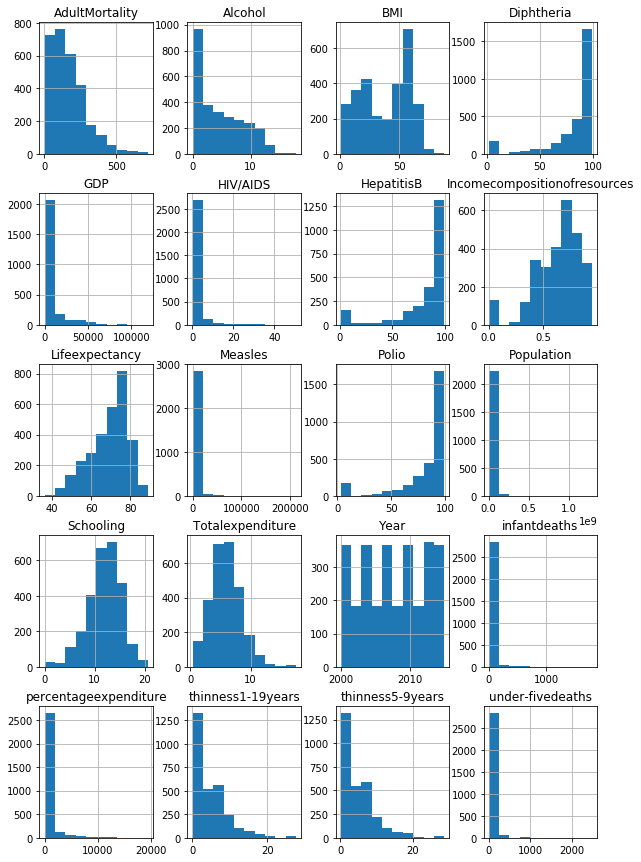

In [263]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

### Checking for Missing values

In [200]:
data.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

### Fill missing values 
* with mean values in numerical columns group by Country
* if values are still blank then, with mean values in numerical columns group by status
* Remove the records which does not have target values. These are the same countries which has only one entry in the dataset.

In [201]:
##### Mean values for missing values group by Country
data_grouped1=data.groupby(['Country'])
data_imputed = data_grouped1.transform(lambda grp: grp.fillna(grp.mean()))

#### Target Column: remove record without values
data_imputed = data_imputed.dropna(axis=0, subset=['Lifeexpectancy'])
data_imputed[['Country']]=data[['Country']]
data_imputed[['Status']]=data[['Status']]


##### Mean values for missing valuesgroup by status
data_grouped2=data_imputed.groupby(['Status'])
data_imputed = data_grouped2.transform(lambda grp: grp.fillna(grp.mean()))
data_imputed[['Country']]=data[['Country']]
data_imputed[['Status']]=data[['Status']]

data_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
Year                            2928 non-null int64
Lifeexpectancy                  2928 non-null float64
AdultMortality                  2928 non-null float64
infantdeaths                    2928 non-null int64
Alcohol                         2928 non-null float64
percentageexpenditure           2928 non-null float64
HepatitisB                      2928 non-null float64
Measles                         2928 non-null int64
BMI                             2928 non-null float64
under-fivedeaths                2928 non-null int64
Polio                           2928 non-null float64
Totalexpenditure                2928 non-null float64
Diphtheria                      2928 non-null float64
HIV/AIDS                        2928 non-null float64
GDP                             2928 non-null float64
Population                      2928 non-null float64
thinness1-19years               2928 

### Creating dummies for categorical variables

In [202]:
#### Binary Columns
data_imputed['Status'] = data_imputed['Status'].map({'Developing':1, 'Developed':0}).astype(int)
data_imputed.describe(include=['O'])

#### Vector Column
Country=pd.get_dummies(data_imputed['Country'],columns='Country',prefix='Country')
Year=pd.get_dummies(data_imputed['Year'],columns='Year',prefix='Year')
data_imputed=pd.concat([data_imputed, Country], axis=1)
data_imputed=pd.concat([data_imputed, Year], axis=1)

#### Drop original vector column
data_imputed.drop(['Country'],axis=1,inplace= True)
data_imputed.drop(['Year'],axis=1,inplace= True)

## 2. Regression
### Split the data into train, validation and test
* As we can see from the graphs of the input varibles, it is clear that they not have normally distributed data, hence we are using MinMaxScaling

In [271]:
#### x and Y
x=data_imputed.copy()
x.drop(['Lifeexpectancy'],axis=1,inplace= True)
y=data_imputed['Lifeexpectancy']
#y=pd.DataFrame(y)


#split train-test data and scalling 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)
x_tr, x_val, y_tr, y_val = train_test_split(x_train,y_train,random_state=0)
mn = MinMaxScaler()
x_train = pd.DataFrame(mn.fit_transform(x_train))
x_test = pd.DataFrame(mn.transform(x_test))
x_tr = pd.DataFrame(mn.fit_transform(x_tr))
x_val = pd.DataFrame(mn.transform(x_val))

### Model-1 Linear Regression
#### Cross validation

In [272]:
#linear regression with cross validation
cvsl={'Model':[],'Mean_Score':[],'Std':[]}
Cross_validation_Score = pd.DataFrame(cvsl)
lreg = LinearRegression()
cslreg=cross_val_score(lreg,x_train,y_train,cv=5)
Cross_validation_Score = Cross_validation_Score.append({'Model':'Linear Regression','Mean_Score':cslreg.mean(),'Std':cslreg.std() * 2}, ignore_index=True)
print("Avg Cross Validation Score: %0.6f (+/- %0.2f)" % (cslreg.mean(), cslreg.std() * 2))

Avg Cross Validation Score: 0.955076 (+/- 0.01)


### Model-2 Ridge
#### Naive Grid search & Graphical representation of alpha paramter and train-test scores

Best score: 0.9610
Best parameters: {'alpha': 0.01}


Text(0.5, 0, '$\\alpha$')

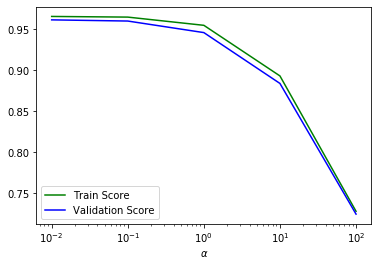

In [275]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

best_score=0
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(x_tr,y_tr)
    train_score_list.append(ridge.score(x_tr,y_tr))
    score=ridge.score(x_val, y_val)
    test_score_list.append((score))
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}

print("Best score: {:.4f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### Cross validation

In [276]:
#Ridge with cross validation
alpha=0.01
ridge = Ridge(alpha)
csridge=cross_val_score(ridge,x_train,y_train,cv=5)
Cross_validation_Score = Cross_validation_Score.append({'Model':'Ridge','Mean_Score':csridge.mean(),'Std':csridge.std() * 2}, ignore_index=True)
print("Avg Cross Validation Score: %0.6f (+/- %0.2f)" % (csridge.mean(), csridge.std() * 2))

Avg Cross Validation Score: 0.954983 (+/- 0.02)


### Model-3 Lasso
#### Naive Grid search & Graphical representation of alpha paramter and train-test scores

Best score: 0.8918
Best parameters: {'alpha': 0.01}


Text(0.5, 0, '$\\alpha$')

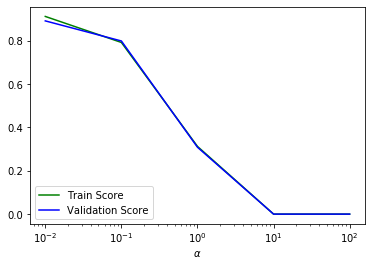

In [277]:
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

best_score=0
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(x_tr,y_tr)
    train_score_list.append(lasso.score(x_tr,y_tr))
    score=lasso.score(x_val, y_val)
    test_score_list.append((score))
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}

print("Best score: {:.4f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### Cross validation

In [278]:
# Lasso with cross validation
alpha=0.01
lasso = Lasso(alpha)
cslasso=cross_val_score(lasso,x_train,y_train,cv=5)
Cross_validation_Score = Cross_validation_Score.append({'Model':'Lasso','Mean_Score':cslasso.mean(),'Std':cslasso.std() * 2}, ignore_index=True)
print("Avg Cross Validation score: %0.6f (+/- %0.2f)" % (cslasso.mean(), cslasso.std() * 2))

Avg Cross Validation score: 0.894714 (+/- 0.02)


### Model-4 Polynomial Regression
#### Naive Grid search & Graphical representation of alpha paramter and train-test scores

Best score: 0.9600
Best parameters: {'Polynomial degree': 1}


Text(0.5, 0, 'Polynomial degree')

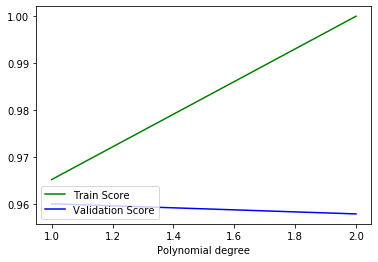

In [283]:
train_score_list = []
test_score_list = []
x_range = [1,2]

best_score=0
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(x_tr)
    X_test_poly = poly.transform(x_val)
    lreg.fit(X_train_poly, y_tr)
    train_score_list.append(lreg.score(X_train_poly, y_tr))
    score=lreg.score(X_test_poly, y_val)
    test_score_list.append((score))
    if score > best_score:
        best_score = score
        best_parameters = {'Polynomial degree': n}

print("Best score: {:.4f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

%matplotlib inline
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Validation Score')
plt.legend(loc = 3)
plt.xlabel('Polynomial degree')

#### Cross validation

In [286]:
# polynomial regression with cross validation
lreg = LinearRegression()
poly = PolynomialFeatures(1)
X_train_poly = poly.fit_transform(x_train)
cslregpoly=cross_val_score(lreg,X_train_poly,y_train,cv=5)
Cross_validation_Score = Cross_validation_Score.append({'Model':'Polynomial Regression','Mean_Score':cslregpoly.mean(),'Std':cslregpoly.std() * 2}, ignore_index=True)
print("Avg Cross Validation score: %0.6f (+/- %0.2f)" % (cslregpoly.mean(), cslregpoly.std() * 2))

Avg Cross Validation score: 0.954351 (+/- 0.01)


### Model-5 SVM Simple
#### Cross Validation

In [287]:
#SVM simple with cross validation
lregSVR = LinearSVR()
cslregSVR=cross_val_score(lregSVR,x_train,y_train,cv=5)
Cross_validation_Score = Cross_validation_Score.append({'Model':'SVM Simple','Mean_Score':cslregSVR.mean(),'Std':cslregSVR.std() * 2}, ignore_index=True)
print("Avg Cross validation score: %0.6f (+/- %0.2f)" % (cslregSVR.mean(), cslregSVR.std() * 2))

Avg Cross validation score: 0.885082 (+/- 0.07)


### Model-6 SVM Kernel=Linear
#### Cross Validation

In [288]:
#SVM Linear with cross validation
lregSVRL = SVR(kernel='linear', C=1)
cslregSVRL=cross_val_score(lregSVRL,x_train,y_train,cv=5)
Cross_validation_Score = Cross_validation_Score.append({'Model':'SVM Kernel=Linear','Mean_Score':cslregSVRL.mean(),'Std':cslregSVRL.std() * 2}, ignore_index=True)
print("Avg Cross validation score: %0.6f (+/- %0.2f)" % (cslregSVRL.mean(), cslregSVRL.std() * 2))

Avg Cross validation score: 0.915591 (+/- 0.03)


### Model-7 SVM Kernel=rbf
#### Naive Grid search & Graphical representation of alpha paramter and train-test scores

In [298]:
Gamma = [0.001, 0.01, 0.1, 1, 10, 100]
C = [0.001, 0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

best_score=0
for gamma in Gamma: 
    for c in C:
        lregSVRR = SVR(kernel='rbf', gamma=gamma, C=c)
        lregSVRR.fit(x_tr,y_tr)
        train_score_list.append(lregSVRR.score(x_tr,y_tr))
        score=lregSVRR.score(x_val, y_val)
        test_score_list.append((score))
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma, 'C': c}

print("Best score: {:.4f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.9592
Best parameters: {'gamma': 0.1, 'C': 100}


<IPython.core.display.Javascript object>


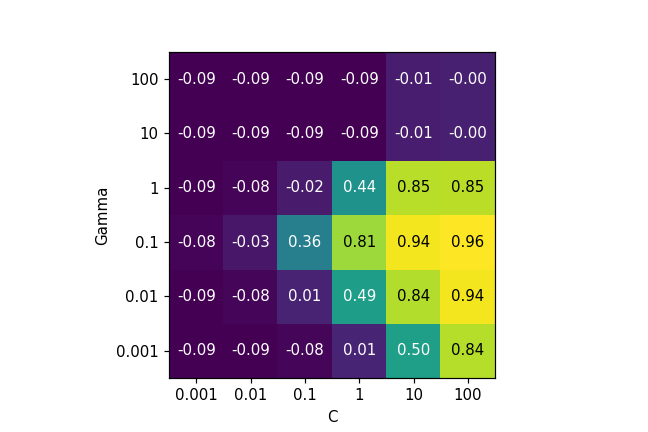

In [300]:
# plot the mean cross-validation scores
%matplotlib notebook
import mglearn
scores = np.array(test_score_list).reshape(6, 6)
mglearn.tools.heatmap(scores, xlabel='C', xticklabels=C, ylabel='Gamma', yticklabels=Gamma, cmap="viridis")

#### Cross Validation

In [291]:
#SVM rbf with cross validation
lregSVRR = SVR(kernel='rbf', gamma=0.1, C=100)
cslregSVRR=cross_val_score(lregSVRR,x_train,y_train,cv=5)
Cross_validation_Score = Cross_validation_Score.append({'Model':'SVM Kernel=rbf','Mean_Score':cslregSVRR.mean(),'Std':cslregSVRR.std() * 2}, ignore_index=True)
print("Avg Cross validation score: %0.6f (+/- %0.2f)" % (cslregSVRR.mean(), cslregSVRR.std() * 2))

Avg Cross validation score: 0.957147 (+/- 0.02)


### Model-8 SVM Kernel=poly
#### Naive Grid search & Graphical representation of alpha paramter and train-test scores

In [302]:
Degree = [2,3,4]
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_list = []
test_score_list = []

best_score=0
for degree in Degree: 
    for c in C:
        lregSVRP = SVR(kernel='poly', degree=degree, C=c, gamma='auto')
        lregSVRP.fit(x_tr,y_tr)
        train_score_list.append(lregSVRP.score(x_tr,y_tr))
        score=lregSVRP.score(x_val, y_val)
        test_score_list.append((score))
        if score > best_score:
            best_score = score
            best_parameters = {'Degree': degree, 'C': c}

print("Best score: {:.4f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.8282
Best parameters: {'Degree': 2, 'C': 1000}


<IPython.core.display.Javascript object>


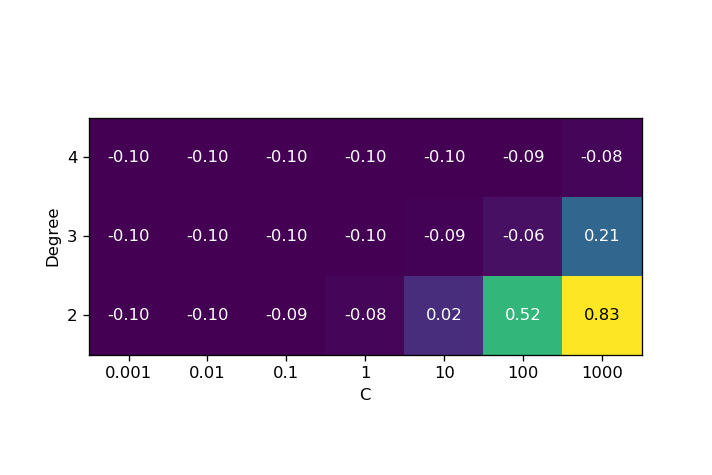

In [221]:
# plot the mean cross-validation scores
%matplotlib notebook
import mglearn
scores = np.array(test_score_list).reshape(3, 7)
mglearn.tools.heatmap(scores, xlabel='C', xticklabels=C, ylabel='Degree', yticklabels=Degree, cmap="viridis")

#### Cross Validation

In [303]:
#SVM Poly with cross validation
lregSVRP = SVR(kernel='poly', degree=2, C=1000, gamma='auto')
lregSVRP.fit(x_train,y_train)
cslregSVRP=cross_val_score(lregSVRP,x_train,y_train,cv=5)
Cross_validation_Score = Cross_validation_Score.append({'Model':'SVM Kernel=Poly','Mean_Score':cslregSVRP.mean(),'Std':cslregSVRP.std() * 2}, ignore_index=True)
print("Avg Cross validation score: %0.6f (+/- %0.2f)" % (cslregSVRP.mean(), cslregSVRP.std() * 2))

Avg Cross validation score: 0.822728 (+/- 0.03)


### Model-9 KNeighborsRegressor
#### Naive Grid search & Graphical representation of alpha paramter and test scores

Best score: 0.8909
Best parameters: {'K': 4}


Text(0.5, 0, 'K')

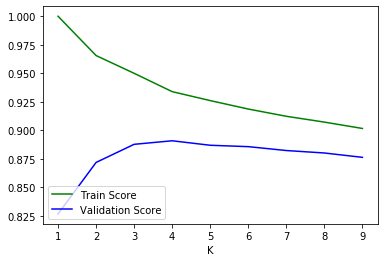

In [304]:
train_score_list = []
test_score_list = []
K=[1,2,3,4,5,6,7,8,9]
best_score=0
for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_tr, y_tr)
    train_score_list.append(knn_reg.score(x_tr, y_tr))
    score=knn_reg.score(x_val, y_val)
    test_score_list.append((score))
    if score > best_score:
        best_score = score
        best_parameters = {'K': k}

print("Best score: {:.4f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


%matplotlib inline
plt.plot(K, train_score_list, c = 'g', label = 'Train Score')
plt.plot(K, test_score_list, c = 'b', label = 'Validation Score')
plt.legend(loc = 3)
plt.xlabel('K')

#### Cross Validation

In [305]:
#KNN with cross validation
knn_reg = KNeighborsRegressor(4)
csknn_reg=cross_val_score(knn_reg,x_train,y_train,cv=5)
Cross_validation_Score = Cross_validation_Score.append({'Model':'KNeighborsRegressor','Mean_Score':csknn_reg.mean(),'Std':csknn_reg.std() * 2}, ignore_index=True)
print("Avg Cross validation score: %0.6f (+/- %0.2f)" % (csknn_reg.mean(), csknn_reg.std() * 2))

Avg Cross validation score: 0.888586 (+/- 0.03)


### Model Comperision

In [318]:
#Cross_validation_Score_list.drop_duplicates
#print(Cross_validation_Score_list.drop_duplicates(keep='last'))
Cross_validation_Score = Cross_validation_Score.drop_duplicates()
print(Cross_validation_Score)

                    Model  Mean_Score       Std
0       Linear Regression    0.955076  0.013500
1                   Ridge    0.954983  0.015913
2                   Lasso    0.894714  0.023043
4   Polynomial Regression    0.954351  0.012865
6              SVM Simple    0.885082  0.068014
7       SVM Kernel=Linear    0.915591  0.034254
8          SVM Kernel=rbf    0.957147  0.016217
9         SVM Kernel=Poly    0.822728  0.029408
10    KNeighborsRegressor    0.888586  0.026405


* As per above table, SVR with kernel=rbf has the highest avg cross validation score. Hence, SMV with Kernel=rbf is the best Model

### Best Model : SVM with kernel=rbf

In [308]:
#### Final Model SVR with RBF Gamma=0.1 and C=100
lregSVRR = SVR(kernel='rbf', gamma=0.1, C=100)
lregSVRR.fit(x_train,y_train)
print("Final Model Train Score:{0}".format(lregSVRR.score(x_train,y_train)))
print("Final Model Test Score:{0}".format(lregSVRR.score(x_test,y_test)))

Final Model Train Score:0.9958136607235222
Final Model Test Score:0.9578471299100133
